In [1]:
# !pip install -r ../requirements.txt

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/final_preprocessed_data_points.csv')
df.head(2)

,_id,image_url,brands,pnns_groups_2,energy-kj_100g,sugars_100g,salt_100g,saturated-fat_100g,proteins_100g,fiber_100g,...,nutrition_grade_fr,negative_points,positive_points,energy_points,sugars_points,sodium_points,saturated_fat_points,fruit_points,fiber_points,proteins_points
0,3.251492e+12,https://images.openfoodfacts.org/images/produc...,Gerblé,Biscuits and cakes,1817.0,21.0,0.00,1.3,9.4,6.4,...,b,10.0,10.0,5,4,0,1,0,5,5
1,3.175680e+12,https://images.openfoodfacts.org/images/produc...,Gerblé,Biscuits and cakes,1961.0,17.0,0.38,2.0,10.0,4.6,...,b,10.0,9.0,5,3,0,1,0,4,5


In [4]:
# Getting the columns
df.columns, df.shape

(Index(['_id', 'image_url', 'brands', 'pnns_groups_2', 'energy-kj_100g',
        'sugars_100g', 'salt_100g', 'saturated-fat_100g', 'proteins_100g',
        'fiber_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
        'sodium_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr',
        'negative_points', 'positive_points', 'energy_points', 'sugars_points',
        'sodium_points', 'saturated_fat_points', 'fruit_points', 'fiber_points',
        'proteins_points'],
       dtype='object'),
 (219, 23))

In [18]:
columns_of_interest = ['energy-kj_100g','sugars_100g', 'salt_100g', 'saturated-fat_100g','proteins_100g', 'fiber_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'sodium_100g']
df1 = df[columns_of_interest]
y = df['nutrition-score-fr_100g']
df1.head(2)
# // rename columns
df1.columns = ['energy', 'sugars', 'salt', 'saturated_fat', 'proteins', 'fiber', 'fruits_vege_nuts', 'sodium']

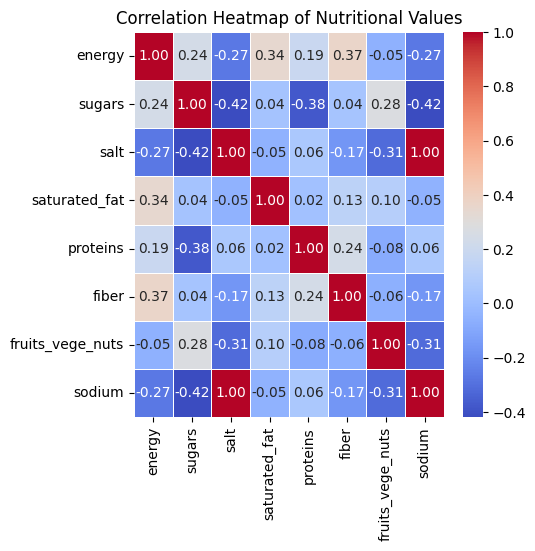

In [19]:
correlation_matrix = df1.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Nutritional Values')
plt.show()

In [10]:
def get_top_correlations_blog(df, threshold=0.3):
    """
    df: the dataframe to get correlations from
    threshold: the maximum and minimum value to include for correlations. 
    For eg, if this is 0.4, only pairs haveing a correlation coefficient greater than 0.4 
    or less than -0.4 will be included in the results. 
    """
    orig_corr = df.corr()
    c = orig_corr.abs()

    so = c.unstack()
    
    i=0
    pairs=set()
    result = pd.DataFrame()
    for index, value in so.sort_values(ascending=False).items():
        # Exclude duplicates and self-correlations
        if value > threshold \
        and index[0] != index[1] \
        and (index[0], index[1]) not in pairs \
        and (index[1], index[0]) not in pairs:
            
            # print(f'|    {index[0]}    |    {index[1]}    |    {orig_corr.loc[(index[0], index[1])]}    |')
            result.loc[i, ['Variable 1', 'Variable 2', 'Correlation']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
            pairs.add((index[0], index[1]))
            i+=1
    return result.reset_index(drop=True).set_index(['Variable 1', 'Variable 2'])

In [11]:
df1.head()

,energy-kj_100g,sugars_100g,salt_100g,saturated-fat_100g,proteins_100g,fiber_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,sodium_100g
0,1817.0,21.0,0.00,1.3,9.4,6.4,21.950000,0.000
1,1961.0,17.0,0.38,2.0,10.0,4.6,13.800000,0.152
2,1791.0,0.0,0.20,1.5,6.2,4.1,9.165625,0.080
3,1727.0,0.0,0.20,3.3,8.0,8.9,19.000000,0.080
4,1870.0,20.0,0.03,1.4,9.5,6.1,14.725000,0.012


In [12]:
top_corr = get_top_correlations_blog(df1)
top_corr

C:\Users\aligh\AppData\Local\Temp\ipykernel_37104\604007130.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'salt_100g' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result.loc[i, ['Variable 1', 'Variable 2', 'Correlation']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
C:\Users\aligh\AppData\Local\Temp\ipykernel_37104\604007130.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'sodium_100g' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result.loc[i, ['Variable 1', 'Variable 2', 'Correlation']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]


,,Correlation
Variable 1,Variable 2,
salt_100g,sodium_100g,1.000000
sodium_100g,sugars_100g,-0.419463
sugars_100g,salt_100g,-0.419463
proteins_100g,sugars_100g,-0.377727
fiber_100g,energy-kj_100g,0.367660
energy-kj_100g,saturated-fat_100g,0.342115
fruits-vegetables-nuts-estimate-from-ingredients_100g,sodium_100g,-0.314279
salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,-0.314279


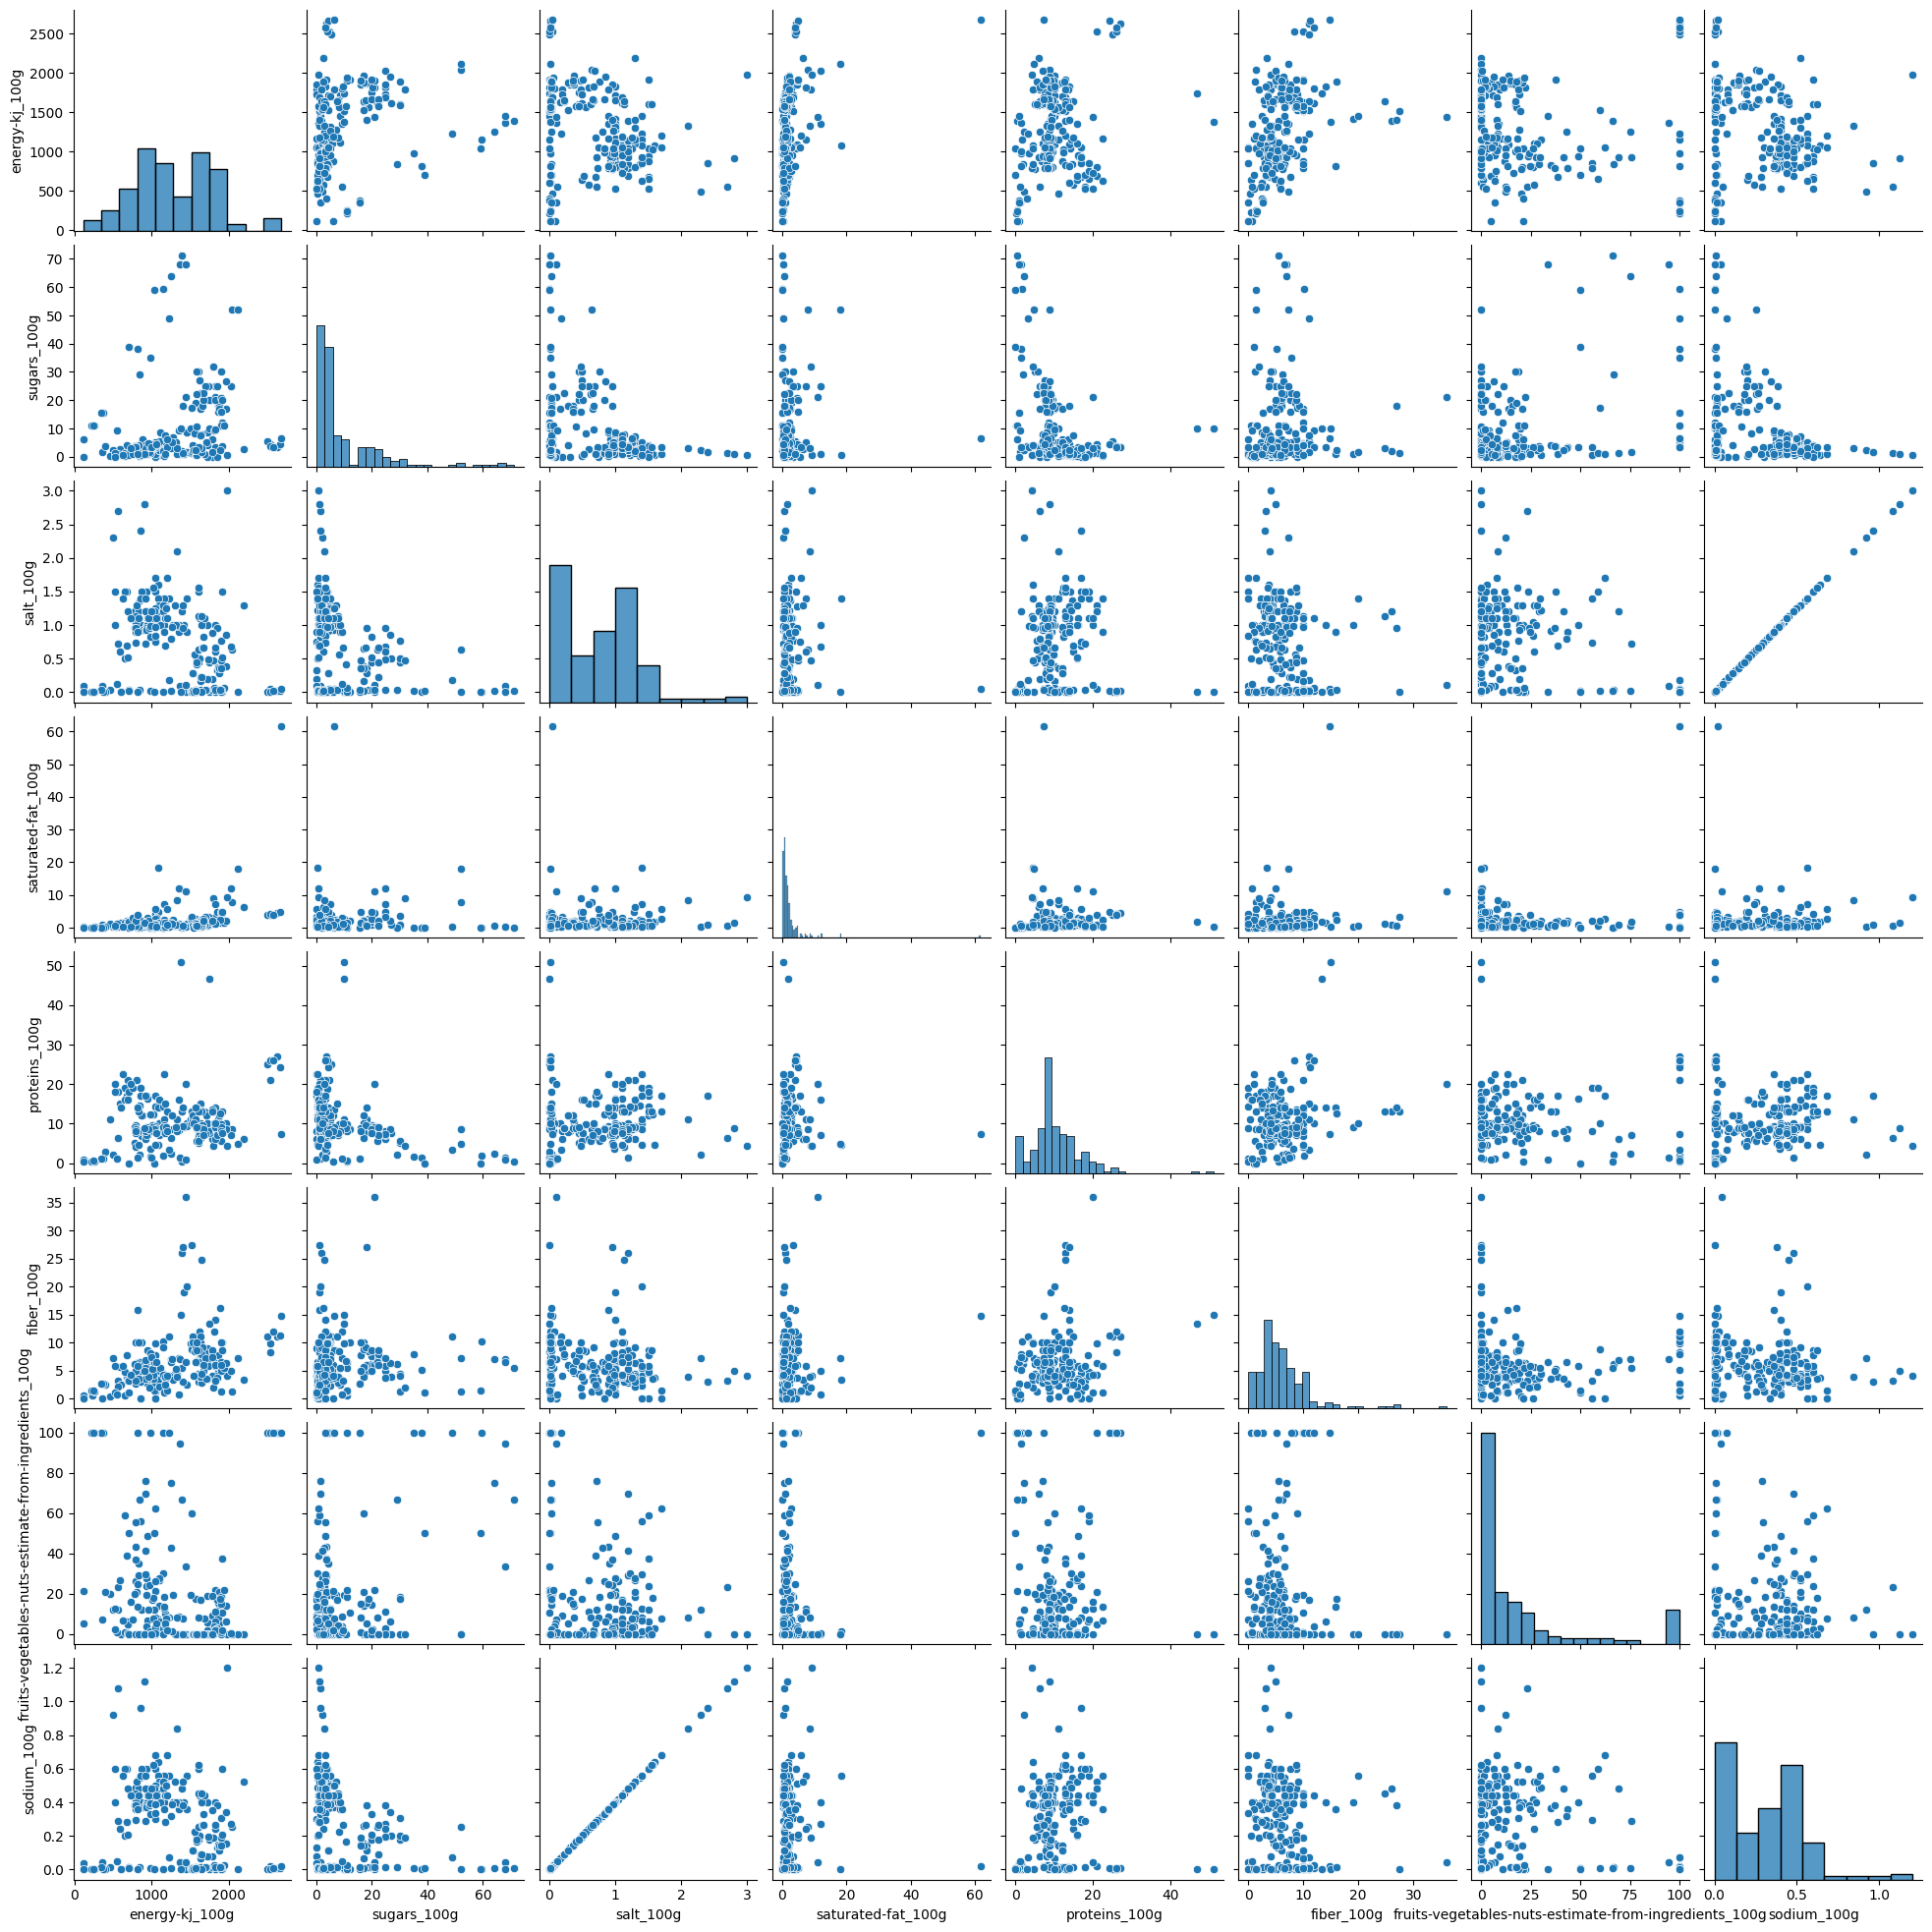

<Figure size 1000x800 with 0 Axes>

In [13]:
# view the distribution and correlation of those strong features by each class

sns.pairplot(df1)
plt.figure(figsize = (10,8))
plt.show()

Some observations:
* Either salt or sodium can be omitted (as it is fully correlated (100%))
* Energy and fats are half correlated (50%)
* Fibers and proteins are half correlated (50%)
* Energy and proteins are half correlated (46%)

Our decisions:
* Ignore salt and include sodium
* Ignore energy (due to correlation with proteins and fats)
* Maximise 1/2(fibers+proteins) as they are correlated
* Assign weight of fruits-vegetables-nuts as 1, as it has weak correlations with all the other variables